# K-Means (Customer Segmentation)

## Imports

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [95]:
df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


## Select Features to Cluster

In [96]:
# Use Annual Income & Spending Score

reduced_df = df.drop(df.loc[:,:'Age'], axis = 1)
reduced_df.head(3)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6


## Visualize the Data

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

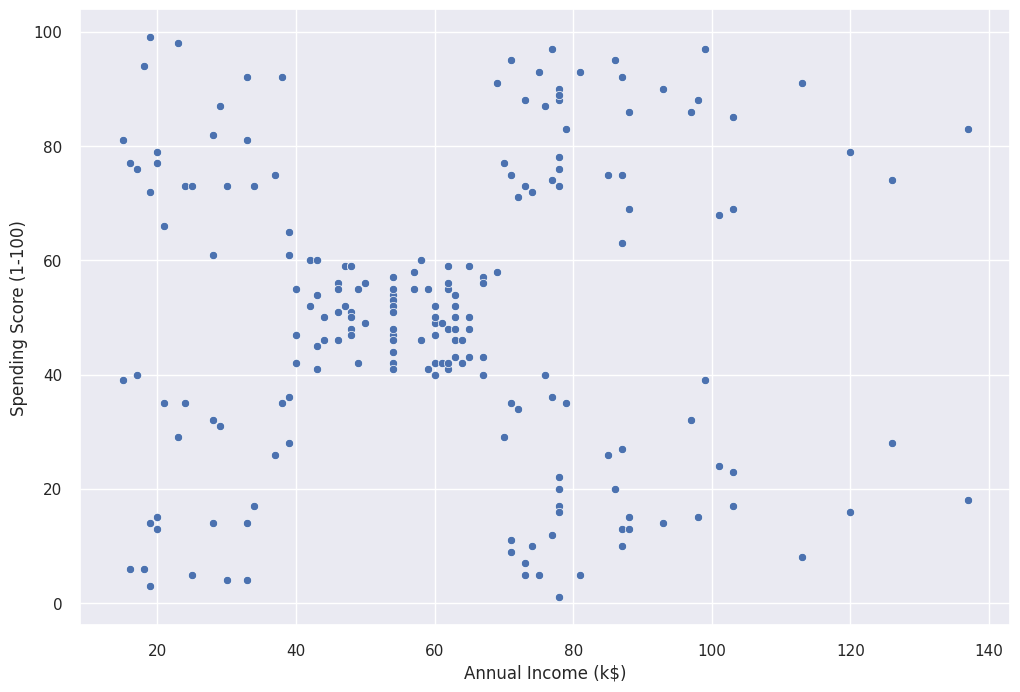

In [97]:
sns.set(rc = {'figure.figsize': (12, 8)})

sns.scatterplot(x = reduced_df.iloc[:,0], y = reduced_df.iloc[:,1])

## Elbow Method for Optimized Clusters

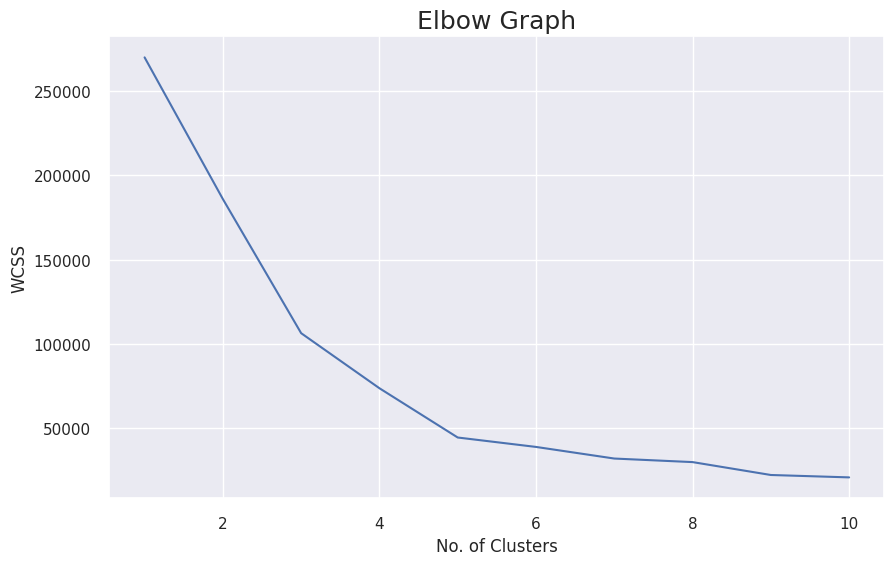

In [98]:
from sklearn.cluster import KMeans

# We will use Within-Cluster-Sum of Squared (WCSS) Errors Algorithm
# WSS score is the sum of these Squared Errors for all the points

wcss = [] #empty list

for i in range(1, 11):

  model = KMeans(n_clusters = i, random_state = 0, n_init = 'auto')
  model.fit(reduced_df)
  wcss.append(model.inertia_)

plt.figure(figsize = (10,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Graph', fontsize = 18)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


## Cluster the Data

<Axes: title={'center': 'Customer Clusters'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

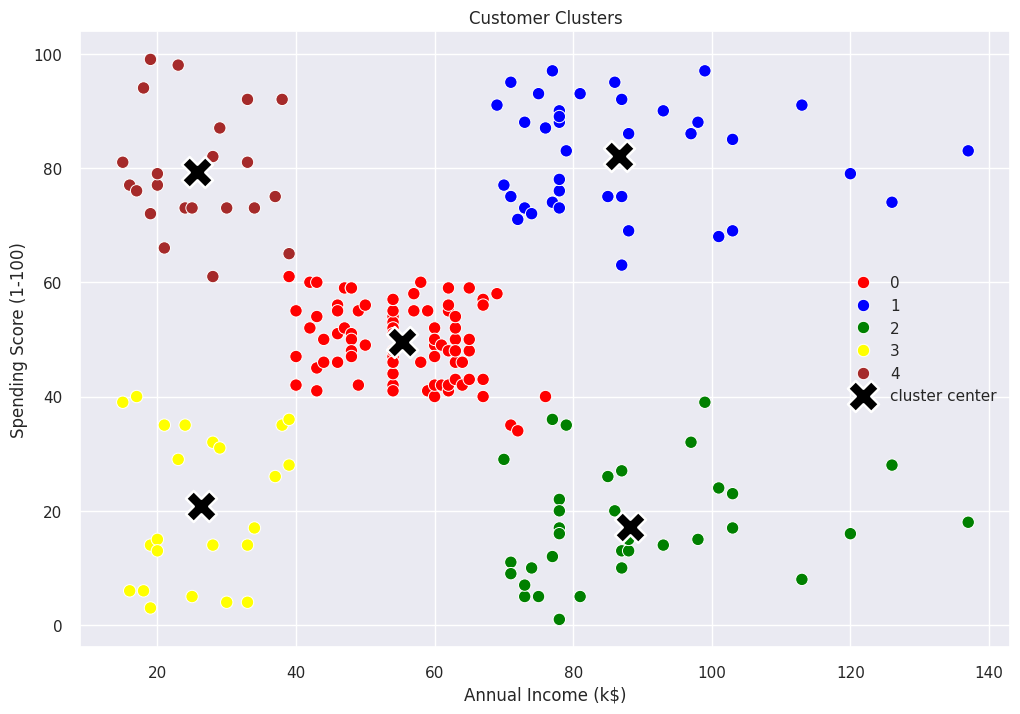

In [99]:
model = KMeans(n_clusters = 5, random_state = 0, n_init = 'auto')
clusters = model.fit_predict(reduced_df)

centroid = model.cluster_centers_
centroid_df = pd.DataFrame(centroid, columns = reduced_df.columns) # Needs to be a DataFrame according to new version update

sns.scatterplot(data = reduced_df, x = reduced_df.iloc[:,0], y = reduced_df.iloc[:,1],
                hue = clusters, palette = ['red','blue','green','yellow','brown'], s = 80).set(title = 'Customer Clusters')

sns.scatterplot(data = centroid_df, x = centroid_df['Annual Income (k$)'], y = centroid_df['Spending Score (1-100)'],
                s = 500, marker = 'X', color = 'black', label = 'cluster center')

In [100]:
clusters

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

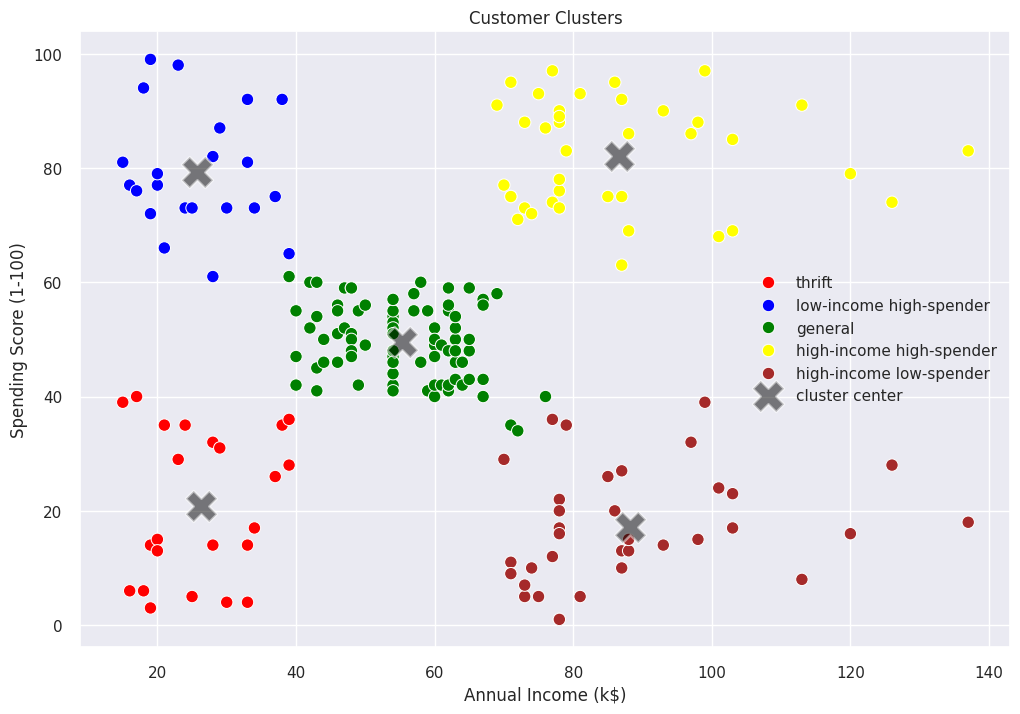

In [111]:
# OR (Fixing Legend)

reduced_df['Cluster Descriptive'] = clusters
reduced_df['Cluster Descriptive'].replace([0,1,2,3,4],['general','high-income high-spender', 'high-income low-spender',
                                                       'thrift', 'low-income high-spender'], inplace = True)

sns.scatterplot(data = reduced_df, x = reduced_df.iloc[:,0], y = reduced_df.iloc[:,1],
                hue = reduced_df['Cluster Descriptive'], palette = ['red','blue','green','yellow','brown'], s = 80).set(title = 'Customer Clusters')

sns.scatterplot(data = centroid_df, x = centroid_df['Annual Income (k$)'], y = centroid_df['Spending Score (1-100)'],
                s = 500, marker = 'X', color = 'black', label = 'cluster center', alpha = 0.5)

plt.show()

## Silhouette Score

## Visualizing Silhouette Score

In [102]:
# Install yellowbrik
# !pip install yellowbrick

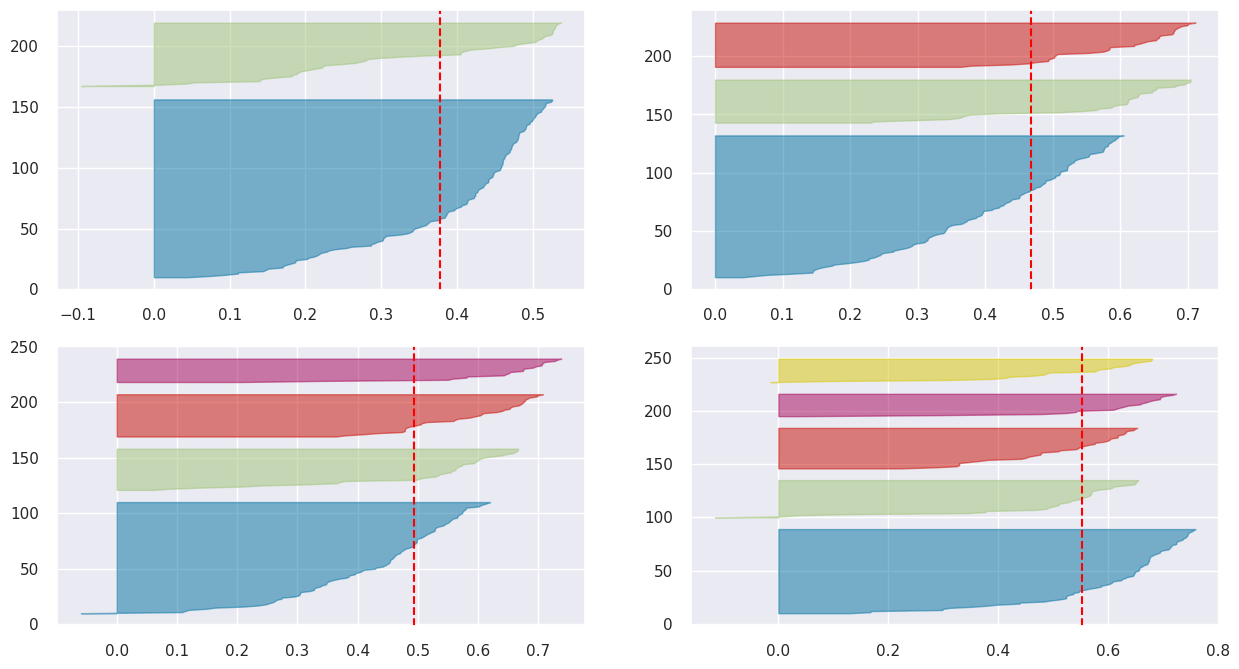

In [103]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2,2, figsize = (15,8))

for i in [2, 3, 4, 5]:

  # Create KMeans instance for different number of clusters

  km = KMeans(n_clusters = i, random_state = 101, n_init = 'auto')
  q, mod = divmod(i, 2)

  # Create SilhouetteVisualizer

  visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q - 1][mod])
  visualizer.fit(reduced_df.drop('Cluster Descriptive', axis = 1))

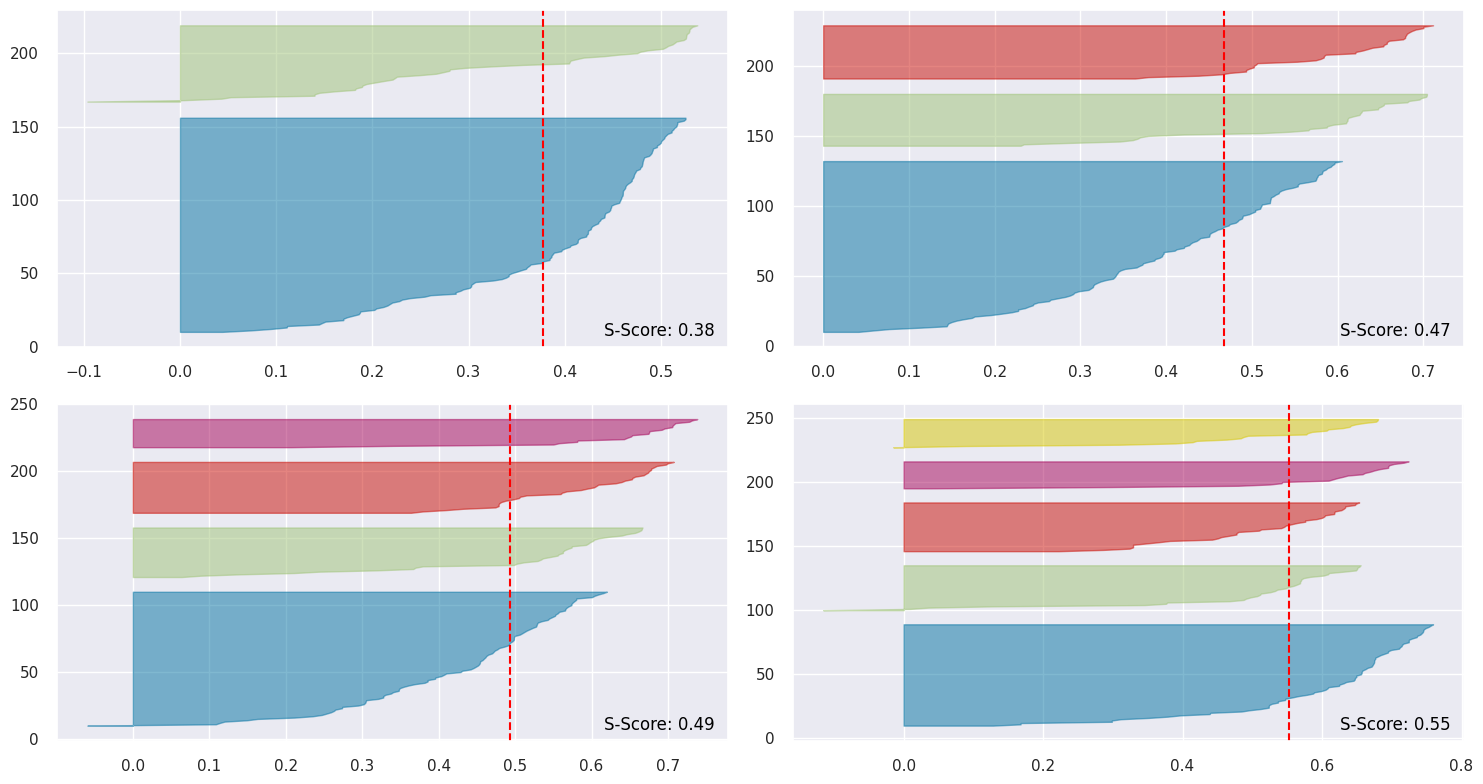

In [104]:
# With Scores on the Graph

fig, ax = plt.subplots(2, 2, figsize=(15, 8))

for i in [2, 3, 4, 5]:

    # Create KMeans instance for different number of clusters

    km = KMeans(n_clusters=i, random_state=101, n_init='auto')
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q - 1][mod])
    visualizer.fit(reduced_df.drop('Cluster Descriptive', axis=1))

    # Annotate the silhouette score on the plot
    silhouette_score = visualizer.silhouette_score_
    ax[q - 1][mod].text(0.98, 0.02, f'S-Score: {silhouette_score:.2f}',
                        transform = ax[q - 1][mod].transAxes,
                        ha='right', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()


In [105]:
# NOTE: 5 Clusters (K) gained the highest score at 0.55